In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('dengue.csv').dropna()
x = data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values
distancias=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(x)
    distancias.append(km.inertia_)


Text(0,0.5,'Suma de distancias cuadradas')

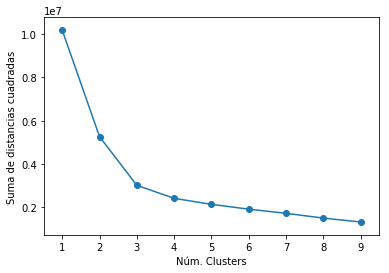

In [5]:
n_cluster=np.linspace(1,len(distancias),len(distancias))
plt.plot(n_cluster,distancias)
plt.scatter(n_cluster,distancias)
plt.xlabel('Núm. Clusters')
plt.ylabel('Suma de distancias cuadradas')

De acuerdo con el método 'elbow', que nos dice que tomemos el número de clusters en el codo del brazo (notar que la figura tiene forma de brazo) es el número óptimo de clusters

In [49]:
data2 = pd.read_csv('BreadBasket_DMS.csv').dropna()
x2 = data2[['Date', 'Time' , 'Transaction', 'Item']].values

date=data2['Date'].values
time=data2['Time'].values
transaction=data2['Transaction'].values
item=data2['Item'].values
le = LabelEncoder()
item = le.fit_transform(item)
day=[]
month=[]
year=[]
horas=[]
mins=[]
seg=[]
for i in date[0:]:
    s=i.split('-')
    day.append(int(s[2]))
    month.append(int(s[1]))
    year.append(int(s[0]))
    
for j in time[0:]:
    t=j.split(':')
    horas.append(int(t[0]))
    mins.append(int(t[1]))
    seg.append(int(t[2]))

x=np.array([day,month,year,horas,mins,seg, transaction, item])
x=np.transpose(x)

sc = StandardScaler()
x = sc.fit_transform(x)

#x=x.reshape(-1,1)


C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
pca_none = PCA(n_components=None)
components_none = pca_none.fit_transform(x)

ev = pca_none.explained_variance_ratio_
cv = []
count = ev[0]
for i in range(0,ev.size):
    if i > 0:
        count += ev[i]
    cv.append(count)
    
pca_2 = PCA(n_components=2)
nuevoX = pca_2.fit_transform(x)
comp= pca_2.components_

print(comp)


[[-0.00744939  0.57913844 -0.59939238 -0.05919493 -0.01606734  0.00411582
  -0.5488491  -0.01604584]
 [-0.16278789  0.02248903 -0.01539098  0.66879442 -0.66357549 -0.08991952
  -0.01872867  0.27695266]]


In [51]:
def f(x, y):
    m = y/x
    return m

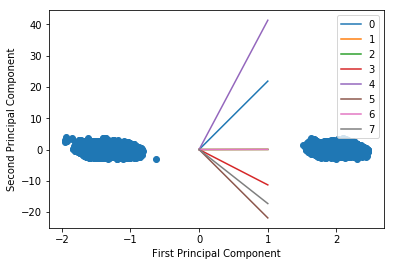

In [52]:
X1 = nuevoX[:,0]
X2 = nuevoX[:,1]

a = np.linspace(0,1)

plt.figure()
plt.scatter(X1, X2)
for i in range(0,comp[0,:].size):
    plt.plot(a, f(comp[0,i], comp[1,i])*a, label=str(i))
plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

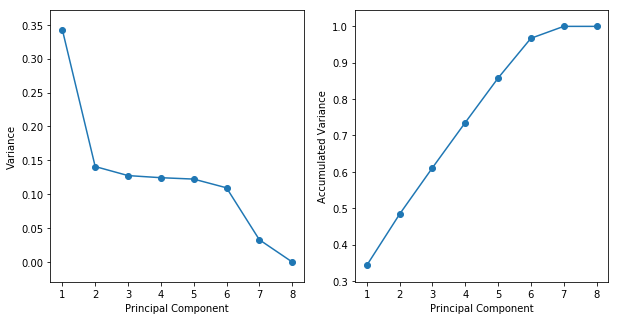

In [53]:
x_1 = np.linspace(1, ev.size, ev.size)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_1,ev)
plt.plot(x_1, ev)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.subplot(1,2,2)
plt.scatter(x_1,cv)
plt.plot(x_1, cv)
plt.xlabel('Principal Component')
plt.ylabel('Accumulated Variance')
plt.show()

In [54]:
distancias=[]
x=x.reshape(-1,1)
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(x)
    distancias.append(km.inertia_)

Text(0,0.5,'Suma de distancias cuadradas')

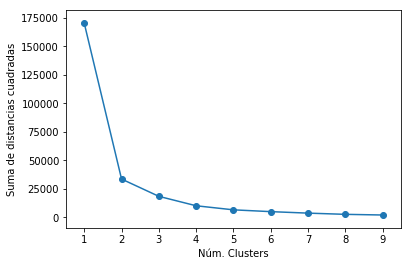

In [55]:
n_cluster=np.linspace(1,len(distancias),len(distancias))
plt.plot(n_cluster,distancias)
plt.scatter(n_cluster,distancias)
plt.xlabel('Núm. Clusters')
plt.ylabel('Suma de distancias cuadradas')

In [56]:
x_nuevo=np.array([month,horas,transaction])
x_nuevo=np.transpose(x_nuevo)

sc = StandardScaler()
x_nuevo = sc.fit_transform(x_nuevo)

C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
distancias=[]
#x_nuevo=x_nuevo.reshape(-1,1)
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(x_nuevo)
    distancias.append(km.inertia_)
print(x_nuevo)

[[ 0.89847253 -1.40121784 -1.7760173 ]
 [ 0.89847253 -0.97072551 -1.77565858]
 [ 0.89847253 -0.97072551 -1.77565858]
 ...
 [-0.41793805  0.75124378  1.69710553]
 [-0.41793805  0.75124378  1.69710553]
 [-0.41793805  1.1817361   1.69746425]]


Text(0,0.5,'Suma de distancias cuadradas')

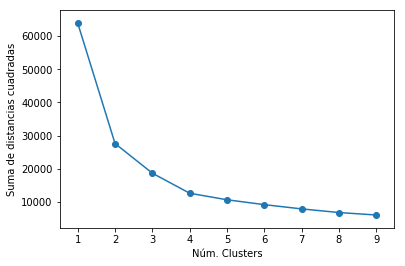

In [58]:
n_cluster=np.linspace(1,len(distancias),len(distancias))
plt.plot(n_cluster,distancias)
plt.scatter(n_cluster,distancias)
plt.xlabel('Núm. Clusters')
plt.ylabel('Suma de distancias cuadradas')

Text(0,0.5,'Hora del día')

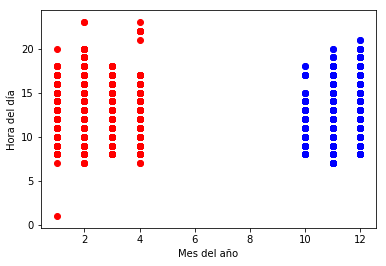

In [59]:
km=KMeans(n_clusters=2)
km.fit(x_nuevo)
clusters=km.fit_predict(x_nuevo)
month=np.array(month)
horas=np.array(horas)
mes0=month[clusters==0]
mes1=month[clusters==1]
horas0=horas[clusters==0]
horas1=horas[clusters==1]

plt.scatter(mes0,horas0, c='b')
plt.scatter(mes1,horas1, c='r')
plt.xlabel('Mes del año')
plt.ylabel('Hora del día')


Notar que la primera forma de asociación es por mes. Esto puede tener que ver con la temporada del año. Es decir, ciertos productos se compraron a finales de año mientras otros a comienzos

Text(0,0.5,'Hora del día')

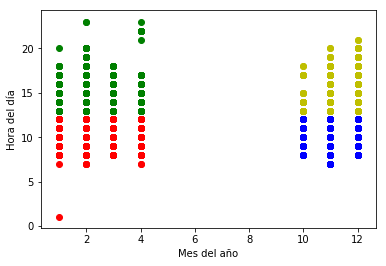

In [60]:
km=KMeans(n_clusters=4)
km.fit(x_nuevo)
clusters=km.fit_predict(x_nuevo)
month=np.array(month)
horas=np.array(horas)
mes0=month[clusters==0]
mes1=month[clusters==1]
mes2=month[clusters==2]
mes3=month[clusters==3]
horas0=horas[clusters==0]
horas1=horas[clusters==1]
horas2=horas[clusters==2]
horas3=horas[clusters==3]


plt.scatter(mes0,horas0, c='b')
plt.scatter(mes1,horas1, c='r')
plt.scatter(mes2,horas2, c='g')
plt.scatter(mes3,horas3, c='y')
plt.xlabel('Mes del año')
plt.ylabel('Hora del día')

Notar que la segunda forma de asociación será entonces la hora del día en que se compraron los productos y el corte es casi que a medio día. Es decir, existen ciertos productos que se están comprando principalmente por la mañana y otros principalmente por la tarde.